In [229]:
import pandas as pd
import numpy as np

In [230]:
df = pd.read_csv('mtcars.csv')
df.rename(columns={'Unnamed: 0' :'car'}, inplace=True)
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### 데이터 타입 확인하기 (Object, Int, Float)

In [231]:
df.dtypes

car      object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [232]:
# 데이터 타입 변경하기 (1개)
df1 = df.copy() 
df1 = df1.astype({'cyl':'object'})
print(df1.dtypes)

car      object
mpg     float64
cyl      object
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object


In [233]:
# 데이터 타입 변경하기(2개 이상)
df1 = df1.astype({'cyl':'int','gear':'object'})
print(df1.dtypes)

car      object
mpg     float64
cyl       int32
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear     object
carb      int64
dtype: object


In [234]:
df1['cyl']

0     6
1     6
2     4
3     6
4     8
5     6
6     8
7     4
8     4
9     6
10    6
11    8
12    8
13    8
14    8
15    8
16    8
17    4
18    4
19    4
20    4
21    8
22    8
23    8
24    8
25    4
26    4
27    4
28    8
29    6
30    8
31    4
Name: cyl, dtype: int32

In [235]:
df1['cyl'].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

### 2. 기초통계랑(평균, 중앙값, IQR, 표준편차 등)
#### 1) 중심측도를 나타내는 값(평균, 중앙값, 최빈값)

In [236]:
df = pd.read_csv('mtcars.csv')
df.rename(columns={'Unnamed: 0' : 'car'},inplace = True)
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [237]:
# (행,열) 
df.shape 

(32, 12)

In [238]:
# 평균값 구하기
mpg_mean = df['mpg'].mean()
print(mpg_mean)

20.090624999999996


In [239]:
# 중앙값 구하기
mpg_median = df['mpg'].median()
print(mpg_median)

19.2


In [240]:
# 최빈값 구하기
mpg_mode = df['mpg'].mode()
print(mpg_mode)
print('--------------------')
print(df['mpg'].value_counts()) 

# 'mpg' 컬럼에서 중복된 값은 2개가 최대이므로 
#  2개 값을 가진 값들이 출력된다  

0    10.4
1    15.2
2    19.2
3    21.0
4    21.4
5    22.8
6    30.4
Name: mpg, dtype: float64
--------------------
21.0    2
19.2    2
30.4    2
22.8    2
15.2    2
10.4    2
21.4    2
33.9    1
19.7    1
15.8    1
26.0    1
27.3    1
13.3    1
15.5    1
21.5    1
24.4    1
14.3    1
32.4    1
14.7    1
18.7    1
18.1    1
17.3    1
16.4    1
17.8    1
15.0    1
Name: mpg, dtype: int64


In [241]:
# 최빈값 구하기
cyl_mode = df['cyl'].mode()
print(cyl_mode)

print('-----------------')
# 최빈값 확인
print(df['cyl'].value_counts())


0    8
Name: cyl, dtype: int64
-----------------
8    14
4    11
6     7
Name: cyl, dtype: int64


- 8이라는 값이 14번 등장 
- 4이라는 값이 11번 등장 
- 따라서 cyl 컬럼의 최빈값은 8

#### 2.산포도를 나타내는 값 (분산, 표준편차, IQR, 범위(최대-최소)등)

In [242]:
# 분산
mpg_var = df['mpg'].var()
print(mpg_var)

36.32410282258065


In [243]:
# 표준편차 
mpg_std = df['mpg'].std()
print(mpg_std)

6.026948052089105


[]

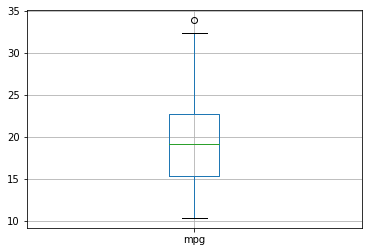

In [244]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10,10))

bxplot_a=df.boxplot(['mpg'])
bxplot_a.plot()


In [245]:
# IQR
Q1 = df['mpg'].quantile(0.25)
Q3 = df['mpg'].quantile(0.75)
IQR = Q3-Q1

print('Q1 = ', Q1)
print('Q3 = ', Q3)
print('Q2 = median = ',df['mpg'].quantile(0.5),'=',df['mpg'].median())
print('IQR = ', IQR)

Q1 =  15.425
Q3 =  22.8
Q2 = median =  19.2 = 19.2
IQR =  7.375


In [246]:
# 범위
mpg_max = df['mpg'].max()
mpg_min = df['mpg'].min()
mpg_range = mpg_max-mpg_min
print('Max : ',mpg_max)
print('Min : ', mpg_min)
print('Range : ', mpg_range)

Max :  33.9
Min :  10.4
Range :  23.5


#### 3) 분포의 비대칭도

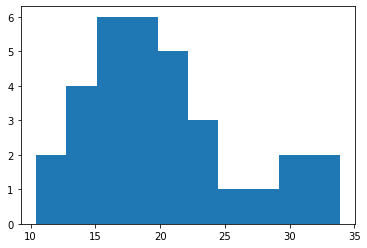

In [247]:
# 히스토그램 그리기
plt.hist(df['mpg'],bins=10)
plt.show()

In [248]:
# 왜도 
mpg_skew = df['mpg'].skew()
print(mpg_skew)

0.6723771376290805


In [249]:
# 첨도
mpg_kurt = df['mpg'].kurt()
print(mpg_kurt)

-0.0220062914240855


#### 4) 기타(합계, 절대값, 데이터 수 등)

In [250]:
# 합계
mpg_sum = df['mpg'].sum()
print(mpg_sum)

642.9000000000001


In [ ]:
# mpg IQR 절대값
IQR2 = Q1-Q3
print(IQR2)
print(abs(IQR2)) 
print(Q3-Q1)

-7.375
7.375
7.375


In [252]:
# 데이터 수
mpg_count = len(df['mpg'])
print(mpg_count)
print(df['mpg'].count())

32
32


#### 5) 그룹화 하여 계산하기 (groupby 활용)

In [253]:
# cyl별 자동차 수 
df.groupby('cyl')['car'].count()

cyl
4    11
6     7
8    14
Name: car, dtype: int64

In [254]:
# iris 데이터로 연습 
import seaborn as sns
df_iris=sns.load_dataset('iris')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [255]:
df_iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [256]:
df_iris.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [257]:
## pivot table 연습하기 
df_titanic = sns.load_dataset('titanic')[['age','sex','class','fare','survived']]
df_titanic.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [258]:
pd.pivot_table(df_titanic,index='class',columns='survived',values=['age',],aggfunc='mean')

age           
survived          0          1
class                         
First     43.695312  35.368197
Second    33.544444  25.901566
Third     26.555556  20.646118

In [259]:
pd.pivot_table(df_titanic,index='class',columns='sex',values='age',aggfunc=['mean','sum'])

mean                sum         
sex        female       male  female     male
class                                        
First   34.611765  41.281386  2942.0  4169.42
Second  28.722973  30.740707  2125.5  3043.33
Third   21.750000  26.507589  2218.5  6706.42

In [260]:
pd.pivot_table(df_titanic,index=['class','survived'],columns='sex',values=['age','fare'],aggfunc=['min','max'])

min                             max                  \
                   age            fare             age            fare   
sex             female   male   female     male female  male    female   
class  survived                                                          
First  0          2.00  18.00  28.7125   0.0000   50.0  71.0  151.5500   
       1         14.00   0.92  25.9292  26.2875   63.0  80.0  512.3292   
Second 0         24.00  16.00  10.5000   0.0000   57.0  70.0   26.0000   
       1          2.00   0.67  10.5000  10.5000   55.0  62.0   65.0000   
Third  0          2.00   1.00   6.7500   0.0000   48.0  74.0   69.5500   
       1          0.75   0.42   7.2250   0.0000   63.0  45.0   31.3875   

                           
                           
sex                  male  
class  survived            
First  0         263.0000  
       1         512.3292  
Second 0          73.5000  
       1          39.0000  
Third  0          69.5500  
       1          56.4958

In [261]:
# groupby 멀티 인덱스
gdf = df_titanic.groupby(['class','sex']).mean()
gdf

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [262]:
# 멀티 인덱스 인덱싱
gdf.loc['First','female']

age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64

In [263]:
# 멀티 인덱서 : .xs
gdf.xs('male',level='sex')

,age,fare,survived
class,,,
First,41.281386,67.226127,0.368852
Second,30.740707,19.741782,0.157407
Third,26.507589,12.661633,0.135447


In [264]:
# 멀티인덱서 xs 연습 
pdf3 = pd.pivot_table(df_titanic,
                      index=['class','sex'],
                      columns='survived',
                      values=['age','fare'],
                      aggfunc=['mean','max']
                      )
pdf3

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  
       male     69.55   56.4958

In [265]:
# First 그룹 인덱싱
pdf3.xs('First')

mean                                      max                \
                age                   fare               age          fare   
survived          0          1           0           1     0     1       0   
sex                                                                          
female    25.666667  34.939024  110.604167  105.978159  50.0  63.0  151.55   
male      44.581967  36.248000   62.894910   74.637320  71.0  80.0  263.00   

                    
                    
survived         1  
sex                 
female    512.3292  
male      512.3292

In [266]:
pdf3.xs('male',level='sex')

mean                                    max                \
                age                  fare              age          fare   
survived          0          1          0          1     0     1       0   
class                                                                      
First     44.581967  36.248000  62.894910  74.637320  71.0  80.0  263.00   
Second    33.369048  16.022000  19.488965  21.095100  70.0  62.0   73.50   
Third     27.255814  22.274211  12.204469  15.579696  74.0  45.0   69.55   

                    
                    
survived         1  
class               
First     512.3292  
Second     39.0000  
Third      56.4958

In [267]:
# level에 사용된 0은 컬럼명이 아니라 행 인덱스의 레벨을 의미
# pdf3.xs(('Second','male'),level=['class','sex']) 와 동일 
pdf3.xs(('Second','male'),level=[0,1])

mean                               max                  
                   age               fare            age        fare      
survived             0       1          0        1     0     1     0     1
class  sex                                                                
Second male  33.369048  16.022  19.488965  21.0951  70.0  62.0  73.5  39.0

In [268]:
pdf3.xs(('First','female'))

            survived
mean  age   0            25.666667
            1            34.939024
      fare  0           110.604167
            1           105.978159
max   age   0            50.000000
            1            63.000000
      fare  0           151.550000
            1           512.329200
Name: (First, female), dtype: float64

In [269]:
# 위와 동일한 결과를 반환하지만 level 지정시 데이터프레임으로 결과 반환
pdf3.xs(('First','female'),level=['class','sex'])

mean                                      max        \
                    age                   fare               age         
survived              0          1           0           1     0     1   
class sex                                                                
First female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   

                                
                fare            
survived           0         1  
class sex                       
First female  151.55  512.3292

In [270]:
# 열의 멀티인덱스 인덱싱은 행인덱스의 인덱싱방법과 동일하며 axis=1 옵션만 추가
pdf3.xs('mean',axis=1)

age                   fare            
survived               0          1           0           1
class  sex                                                 
First  female  25.666667  34.939024  110.604167  105.978159
       male    44.581967  36.248000   62.894910   74.637320
Second female  36.000000  28.080882   18.250000   22.288989
       male    33.369048  16.022000   19.488965   21.095100
Third  female  23.818182  19.329787   19.773093   12.464526
       male    27.255814  22.274211   12.204469   15.579696

In [271]:
pdf3.xs(('mean','age'),axis=1)

survived               0          1
class  sex                         
First  female  25.666667  34.939024
       male    44.581967  36.248000
Second female  36.000000  28.080882
       male    33.369048  16.022000
Third  female  23.818182  19.329787
       male    27.255814  22.274211

### 3. 데이터 인덱싱, 필터링, 정렬 변경등

#### 1)데이터 인덱싱

In [272]:
# 행/열 인덱싱 : df.loc['행','열'] or df.iloc[row index, column index]
print(df.loc[3,'mpg'])
print(df.iloc[3,1])

21.4
21.4


In [273]:
# 열만 인덱싱
print(df.loc[:,'mpg'].head())
print('--------------')
print(df.iloc[:,1].head())

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64
--------------
0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64


In [274]:
# 여러가지 열 가지고 오기
print(df.loc[0:3,['mpg','cyl','disp']])
print('----------------------------')
print(df.loc[0:3,'mpg' : 'disp'])
print('----------------------------')
print(df.iloc[0:3, 1:4])

    mpg  cyl   disp
0  21.0    6  160.0
1  21.0    6  160.0
2  22.8    4  108.0
3  21.4    6  258.0
----------------------------
    mpg  cyl   disp
0  21.0    6  160.0
1  21.0    6  160.0
2  22.8    4  108.0
3  21.4    6  258.0
----------------------------
    mpg  cyl   disp
0  21.0    6  160.0
1  21.0    6  160.0
2  22.8    4  108.0


In [275]:
# 앞에서 n 행 인덱싱
df.head(2)

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [276]:
# 뒤에서 n 행 인덱싱
df.tail(2)

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.78,18.6,1,1,4,2


#### 2) 열(Columns) 추가/제거

In [277]:
# 열선택
df_cyl = df['cyl']
df_cyl.head(3)

0    6
1    6
2    4
Name: cyl, dtype: int64

In [278]:
df_new = df[['cyl','mpg']]
df_new.head(3)

,cyl,mpg
0,6,21.0
1,6,21.0
2,4,22.8


In [279]:
# 열제거
print(df.head(3))
print('-------------------------------------------------------')
print(df.drop(columns=['car','mpg','cyl']).head(3))

             car   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0      Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1  Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2     Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   

   carb  
0     4  
1     4  
2     1  
-------------------------------------------------------
    disp   hp  drat     wt   qsec  vs  am  gear  carb
0  160.0  110  3.90  2.620  16.46   0   1     4     4
1  160.0  110  3.90  2.875  17.02   0   1     4     4
2  108.0   93  3.85  2.320  18.61   1   1     4     1


In [280]:
# 열 추가
df2 = df.copy()
df2['new'] = df['mpg'] +10
df2.head(3)

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,new
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,31.0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,31.0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,32.8


#### 3) 데이터 필터링

In [281]:
# 1개 조건 필터링
# cyl=4인 데이터의 수
print(len(df[df['cyl']==4]))
print('---------------------')
print(df['cyl'].value_counts())

11
---------------------
8    14
4    11
6     7
Name: cyl, dtype: int64


In [282]:
# mpg 값이 22이상인 데이터 수
print(len(df[df['mpg']>=22]))

9


In [283]:
# 2개의 조건 필터링
cond1 = (df['cyl'] == 4)
cond2 = (df['mpg']>= 22)
df[cond1 & cond2]

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


In [284]:
# 2개의 조건 필터링
cond1 = (df['cyl'] == 4)
cond2 = (df['mpg']>= 22)
df[cond1 | cond2]

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


#### 4) 데이터 정렬

In [285]:
# 내림차순 정렬 
df.sort_values('mpg',ascending=False).head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1


In [286]:
# 오름차순 정렬
df.sort_values('mpg',ascending=True).head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


#### 5) 데이터변경(조건문)

In [287]:
# np.where 활용
# np 변수 값 중에서 205가 넘은값은 205로 처리하고 나머지는 그대로 유지 
df['hp'] = np.where(df['hp']>=205,205, df['hp'])  # (조건, 참, 거짓)

# 내림차순 정렬
df.sort_values('hp', ascending=False).head()

# 활용: 이상치를 Max 값이나 Min 값으로 대체할 경우 조건문 활용 

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
16,Chrysler Imperial,14.7,8,440.0,205,3.23,5.345,17.42,0,0,3,4
30,Maserati Bora,15.0,8,301.0,205,3.54,3.570,14.60,0,1,5,8
28,Ford Pantera L,15.8,8,351.0,205,4.22,3.170,14.50,0,1,5,4
6,Duster 360,14.3,8,360.0,205,3.21,3.570,15.84,0,0,3,4
23,Camaro Z28,13.3,8,350.0,205,3.73,3.840,15.41,0,0,3,4


### 4.결측치,이상치, 중복값 처리(제거 or 대체)

#### 데이터 불러오기 (타이타닉 데이터셋)
- 종속변수(y) : 생존여부 (0 사망 , 1 생존)
- 독립변수(x) : pclass, sex, age 등의 탑승자 정보 (변수)

In [288]:
import seaborn as sns

# 데이터셋 목록 : sns.get_dataset_names()
# sns.get_dataset_names()

df_titanic = sns.load_dataset('titanic')

df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [289]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [290]:
df_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [291]:
df_titanic.shape

(891, 15)

In [292]:
df_titanic_2 = df_titanic.copy()

In [293]:
#### 1) 결측치 확인 및 처리 
df_titanic_2.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [294]:
# 결측치 제거
print(df_titanic_2.dropna(axis=0).shape) # 행기준
print(df_titanic_2.dropna(axis=1).shape) # 열기준

(182, 15)
(891, 11)


In [295]:
median_age = df_titanic_2['age'].median()
print(median_age)

28.0


In [296]:
# 중앙값을 구한 뒤 결측치 대체
df_titanic_2['age'] = df_titanic_2['age'].fillna(median_age)

# 결측치 처리 확인 
df_titanic_2.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [297]:
print(df_titanic['age'].mean())
print(df_titanic_2['age'].mean())


29.69911764705882
29.36158249158249


In [299]:
# 중복값 제거 시 
df_titanic_2.drop_duplicates().shape

(781, 15)

#### 2) 이상치 확인 및 처리
##### 상자그림 활용 (이상치 : Q1, Q3로 부터 1.5*IQR을 초과한 값)

c:\Users\chohyeri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

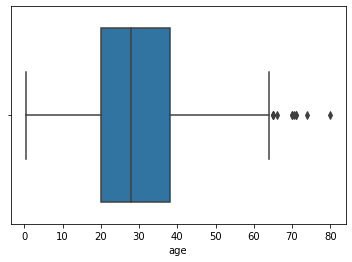

In [301]:
# 참고! (실제 시험장에서는 그래프 미표시)
sns.boxplot(df_titanic['age'])

In [303]:
# Q1, Q3, IQR 구하기
Q1 = df_titanic['age'].quantile(0.25)
Q3 = df_titanic['age'].quantile(0.75)
IQR = abs(Q1-Q3)
print(Q1, Q3, IQR)


20.125 38.0 17.875


In [304]:
upper = Q3 + 1.5*IQR
lower = Q1-1.5*IQR
print(upper, lower)

64.8125 -6.6875


In [305]:
# 문제 : age 변수의 이상치를 제외한 데이터 수는? (상자그림 기준)
cond1 = df_titanic['age']<= upper
cond2 = df_titanic['age']>= lower

print(len(df_titanic[cond1 & cond2]))

703


In [306]:
# 문제 age 변수의 이상치를 제외한 데이터셋 확인 (상자그림 기준)
df_new = df_titanic[cond1 & cond2]
print(df_new)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

##### 표준정규분포 활용 (이상치 : ±3Z 값을 넘어가는 값)


In [307]:
# 데이터 표준화  Z = (개별값 - 평균)/표준편차
mean_age = df_titanic['age'].mean()
std_age = df_titanic['age'].std()
print(mean_age)
print(std_age)

29.69911764705882
14.526497332334044


In [308]:
znorm = (df_titanic['age']-mean_age)/std_age
znorm

0     -0.530005
1      0.571430
2     -0.254646
3      0.364911
4      0.364911
         ...   
886   -0.185807
887   -0.736524
888         NaN
889   -0.254646
890    0.158392
Name: age, Length: 891, dtype: float64

In [310]:
# 문제: 이상치의 개수는 몇개인가? (±3z 기준)
cond1 = (znorm>3)
cond2 = (znorm<-3)
print(len(df_titanic[cond1]))
print(len(df_titanic[cond2]))

print(len(df_titanic[cond1 | cond2]))

2
0
2


#### 3) 중복값 제거 

In [314]:
# 주의 ! 예제에서는 중복값이 있어서 제거했지만, 중복값이 나올 수 있는 상황이면 제거 X
df_titanic_1 = df_titanic.copy()
df_titanic_1.drop_duplicates(inplace=True)
print(df_titanic_1.shape)

(784, 15)


### 5. 데이터 Scaling (데이터 표준화, 정규화)
#### 1)데이터 표준화 (Z-score normalization)

In [315]:
from sklearn.preprocessing import StandardScaler
zscaler = StandardScaler()
df['mpg'] = zscaler.fit_transform(df[['mpg']])
df.head()


,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,0.153299,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,0.153299,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,0.456737,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,0.220730,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,-0.234427,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [316]:
# 확인 (z-score 변환 = 평균이 0, 표준편차가 1인 표준정규분포로 변환)

print(df['mpg'].mean(), df['mpg'].std())

-5.48172618408671e-16 1.016001016001524


#### 2) 데이터 정규화 (min-max normalization)

In [317]:
from sklearn.preprocessing import MinMaxScaler
mscaler=MinMaxScaler()
df['mpg'] = mscaler.fit_transform(df[['mpg']])
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,0.451064,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,0.451064,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,0.527660,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,0.468085,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,0.353191,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [319]:
# 확인 (최소가 0, 최대가 1)
print(df['mpg'].min(),df['mpg'].max())

0.0 1.0


### 6. 데이터합치기

In [322]:
# 행, 열 방향으로 데이터 합치기
# 데이터 2개로 분리
df_iris_1 = df_iris.loc[0:30,] # 0~30행 데이터
df_iris_2 = df_iris.loc[31:60,] # 31~60행 데이터

print(df_iris_1.head())
print(df_iris_2.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
    sepal_length  sepal_width  petal_length  petal_width species
31           5.4          3.4           1.5          0.4  setosa
32           5.2          4.1           1.5          0.1  setosa
33           5.5          4.2           1.4          0.2  setosa
34           4.9          3.1           1.5          0.2  setosa
35           5.0          3.2           1.2          0.2  setosa


In [324]:
tot_df_iris = pd.concat([df_iris_1,df_iris_2])
tot_df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [326]:
# 데이터 2개로 분리 
df_iris_1 = df_iris.loc[:,'sepal_length':'petal_length'] # 1~3열 데이터 
df_iris_2 = df_iris.loc[:,['petal_width','species']] # 1~3열 데이터 

In [327]:
tot_df_iris = pd.concat([df_iris_1,df_iris_2], axis=1)
tot_df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 7. 날짜/시간 데이터, index 다루기
#### 1) 날짜 다루기

In [334]:
# 테스트 데이터 만들기
df = pd.DataFrame({
  '날짜': ['20240105', '20240105', '20240223', '20240223', '20240312', '20240422', '20230506'],
  '물품': ['A', 'B', 'A', 'B', 'A', 'B', 'A'],
  '판매수': [5, 10, 15, 15, 20, 25, 40],
  '개당수익': [500, 600, 500, 600, 600, 700, 600]
})

df

,날짜,물품,판매수,개당수익
0,20240105,A,5,500
1,20240105,B,10,600
2,20240223,A,15,500
3,20240223,B,15,600
4,20240312,A,20,600
5,20240422,B,25,700
6,20230506,A,40,600


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      7 non-null      object
 1   물품      7 non-null      object
 2   판매수     7 non-null      int64 
 3   개당수익    7 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


In [335]:
# 데이터 타입을 datetime으로 변경
df['날짜'] = pd.to_datetime(df['날짜'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      7 non-null      datetime64[ns]
 1   물품      7 non-null      object        
 2   판매수     7 non-null      int64         
 3   개당수익    7 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 352.0+ bytes


In [331]:
# 년, 월, 일 변수 column 추가하기
df['year'] = df['날짜'].dt.year
df['month'] = df['날짜'].dt.month
df['day'] = df['날짜'].dt.day
df

,날짜,물품,판매수,개당수익,year,month,day
0,2023-01-05,A,5,500,2023,1,5
1,2023-01-05,B,10,600,2023,1,5
2,2023-02-23,A,15,500,2023,2,23
3,2023-02-23,B,15,600,2023,2,23
4,2023-03-12,A,20,600,2023,3,12
5,2023-04-22,B,25,700,2023,4,22
6,2022-05-06,A,40,600,2022,5,6


In [336]:
# 날짜 구간 필터링
df[df['날짜'].between('2024-01-05','2024-02-28')]

,날짜,물품,판매수,개당수익
0,2024-01-05,A,5,500
1,2024-01-05,B,10,600
2,2024-02-23,A,15,500
3,2024-02-23,B,15,600


In [337]:
# 날짜를 인덱스로 설정 후 loc 함수 사용
# 데이터 만들기
df = pd.DataFrame({
  '날짜': ['20240105', '20240105', '20240223', '20240223', '20240312', '20240422', '20240506'],
  '물품': ['A', 'B', 'A', 'B', 'A', 'B', 'A'],
  '판매수': [5, 10, 15, 15, 20, 25, 40],
  '개당수익': [500, 600, 500, 600, 600, 700, 600]
})

df['날짜'] = pd.to_datetime(df['날짜'])

df = df.set_index("날짜")   # drop=True (디폴트)

df.head()

,물품,판매수,개당수익
날짜,,,
2024-01-05,A,5,500
2024-01-05,B,10,600
2024-02-23,A,15,500
2024-02-23,B,15,600
2024-03-12,A,20,600


In [339]:
print(df.loc['2024-01-05':'2024-02-23']) # 해당기간 포함
print(df.loc[(df.index>= '2024-01-5')&(df.index<='2024-02-23')])

           물품  판매수  개당수익
날짜                      
2024-01-05  A    5   500
2024-01-05  B   10   600
2024-02-23  A   15   500
2024-02-23  B   15   600
           물품  판매수  개당수익
날짜                      
2024-01-05  A    5   500
2024-01-05  B   10   600
2024-02-23  A   15   500
2024-02-23  B   15   600


#### 2) 시간 다루기

In [342]:
df = pd.DataFrame({
  '날짜': ['20240105', '20240105', '20240223', '20240223', '20240312', '20240422', '20240506'],
  '물품': ['A', 'B', 'A', 'B', 'A', 'B', 'A'],
  '판매수': [5, 10, 15, 15, 20, 25, 40],
  '개당수익': [500, 600, 500, 600, 600, 700, 600]
})

time = pd.date_range('2024-09-24 12:25:00', '2024-09-25 14:45:30', periods= 7)

df['time'] = time
df = df[['time', '물품', '판매수', '개당수익']]

df

,time,물품,판매수,개당수익
0,2024-09-24 12:25:00,A,5,500
1,2024-09-24 16:48:25,B,10,600
2,2024-09-24 21:11:50,A,15,500
3,2024-09-25 01:35:15,B,15,600
4,2024-09-25 05:58:40,A,20,600
5,2024-09-25 10:22:05,B,25,700
6,2024-09-25 14:45:30,A,40,600


In [343]:
# index 초기화 
df = df.reset_index()

In [344]:
# index 새로 지정 
df = df.set_index('time')
df

,index,물품,판매수,개당수익
time,,,,
2024-09-24 12:25:00,0,A,5,500
2024-09-24 16:48:25,1,B,10,600
2024-09-24 21:11:50,2,A,15,500
2024-09-25 01:35:15,3,B,15,600
2024-09-25 05:58:40,4,A,20,600
2024-09-25 10:22:05,5,B,25,700
2024-09-25 14:45:30,6,A,40,600


In [345]:
# 시간데이터 다루기 (주의 ! 시간이 index에 위치해야 함)
df.between_time(start_time='12:25', end_time='21:00') # 시작, 끝 시간 모두 포함
# include_start=False, include_end=False 옵션으로 시작, 끝 시간 제외 가능

,index,물품,판매수,개당수익
time,,,,
2024-09-24 12:25:00,0,A,5,500
2024-09-24 16:48:25,1,B,10,600
2024-09-25 14:45:30,6,A,40,600


In [346]:
# 날짜랑 시간 모두 필터링 해야하는 경우 loc 함수 사용
print(df.loc['2024-09-24 12:25:00':'2024-09-24 21:11:50']) # 둘다 포함
print(df.loc[(df.index >= '2024-09-24 12:25:00')&(df.index <= '2024-09-24 21:11:50')])

                     index 물품  판매수  개당수익
time                                    
2024-09-24 12:25:00      0  A    5   500
2024-09-24 16:48:25      1  B   10   600
2024-09-24 21:11:50      2  A   15   500
                     index 물품  판매수  개당수익
time                                    
2024-09-24 12:25:00      0  A    5   500
2024-09-24 16:48:25      1  B   10   600
2024-09-24 21:11:50      2  A   15   500
